In [1]:
from spherical import *

In [2]:
# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>
# Copyright (c) 2008, Enthought, Inc.
# License: BSD Style.

from mayavi import mlab
import numpy as np
from scipy.special import sph_harm

# Create a sphere
r = 0.3
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]

x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)

mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(400, 300))
mlab.clf()
# Represent spherical harmonics on the surface of the sphere
for n in range(1, 6):
    for m in range(n):
        s = sph_harm(m, n, theta, phi).real

        #mlab.mesh(x - m, y - n, z, scalars=s, colormap='jet')

        s[s < 0] *= 0.97

        s /= s.max()
        mlab.mesh(s * x - m, s * y - n, s * z + 1.3,
                  scalars=s, colormap='Spectral')

mlab.view(90, 70, 6.2, (-1.3, -2.9, 0.25))
mlab.show()

Object `np.angle.T.ravel` not found.


In [4]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from mayavi import mlab
from scipy.special import *


# Generate the Grid

## Get the hydrogen radial Wavefunction

In [2]:
from sympy import *
from sympy.physics.hydrogen import R_nl
from sympy import var 
from scipy import special

var("r Z")
expr = R_nl(4, 2, r, Z)
radial_wv = lambdify( [r, Z], expr, "numpy")

In [3]:
nx = 200
ny = 200 
nz = 200

x0 = -5.0
x1 = 5.0 
x = np.linspace(x0, x1, nx, endpoint=False)

y0 = x0
y1 = x1
y = np.linspace(y0, y1, ny, endpoint=False)

z0 = x0
z1 = x1
z = np.linspace(z0, z1, nz, endpoint=False)

X, Y, Z = np.meshgrid(x, y, z)

r = np.sqrt(X**2 + Y**2 + Z**2)
ch = 1
R_wv = radial_wv(r, ch)


Phi = np.arctan2(Y, X)
Theta = np.arccos(Z / r)

Y_wv = 1/4. * np.sqrt(15/(2*np.pi)) * (X + 1j * Y)**2/r**2
Psi = R_wv #* Y_wv

mlab.figure(1, fgcolor=(1,1,1), bgcolor=(1,1,1))
src = mlab.pipeline.scalar_field(np.abs(Psi)**2)
src2 = mlab.pipeline.set_active_attribute(src, point_scalars='scalar')
contour = mlab.pipeline.contour(src2)
mlab.pipeline.surface(contour)
mlab.show()

/home/zaph0d/miniconda3/envs/py35_mayavi/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/zaph0d/miniconda3/envs/py35_mayavi/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


# Load simulation data and plot isosurfaces

In [4]:
import numpy as np
import h5py
from mayavi import mlab
#mlab.options.backend = 'envisage'
from Loader3D import *

In [5]:
nx = 200
ny = 200
nz = 200
loc = "../../build/test.h5"

l = CLoader3D(nx,ny,nz,loc)
data = l.get_complex_data("/real","/imag")

x = np.linspace(-30.0, 30.0, nx, endpoint=False)
y = np.linspace(-30.0, 30.0, ny, endpoint=False)
z = np.linspace(-30.0, 30.0, nz, endpoint=False)


X,Y,Z = np.meshgrid(x, y, z)
mlab.figure(1, fgcolor=(1,1,1), bgcolor=(0.9,0.9,0.9))
ab = np.abs(data)**2
src = mlab.pipeline.scalar_field(ab)
mlab.pipeline.iso_surface(src,opacity=0.2, contours=20)
src2 = mlab.pipeline.image_plane_widget(src, plane_orientation='z_axes', slice_index=10)
mlab.pipeline.image_plane_widget(src, plane_orientation='x_axes', slice_index=10)
mlab.colorbar(src2, orientation='vertical', title='Probability density')
mlab.show()

Data has shape(200, 200, 200)


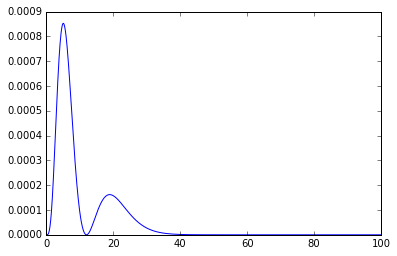